In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
#  Cell 2: Upload `data.csv` to Colab



# Load dataset
df = pd.read_csv("data.csv")
df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [ ]:
# 📊 Cell 3: Basic info

print("✅ Rows & Columns:", df.shape)
print("\n🔎 Data Types:\n", df.dtypes)
df.sample(3)


✅ Rows & Columns: (95662, 16)

🔎 Data Types:
 TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
35966,TransactionId_62121,BatchId_53325,AccountId_4841,SubscriptionId_3829,CustomerId_3066,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2018-12-21T16:05:01Z,2,0
19941,TransactionId_74900,BatchId_26803,AccountId_4841,SubscriptionId_3829,CustomerId_1699,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-5000.0,5000,2018-12-07T16:02:20Z,2,0
84698,TransactionId_138764,BatchId_17732,AccountId_638,SubscriptionId_4491,CustomerId_977,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,622.0,622,2019-02-04T04:53:06Z,2,0


In [ ]:
# 📉 Cell 4: Summary stats of numerical features

df.describe().T

,count,mean,std,min,25%,50%,75%,max
CountryCode,95662.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0


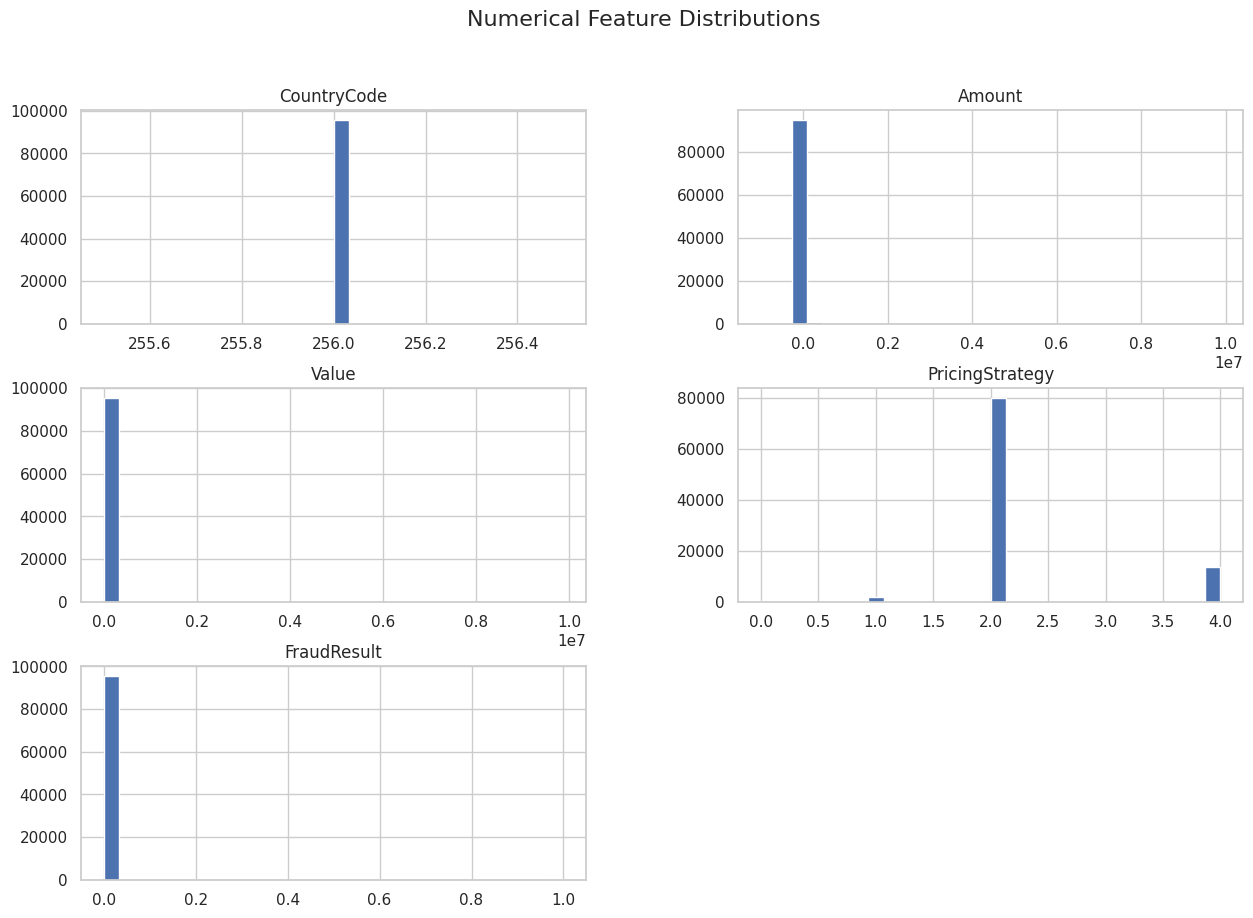

In [ ]:
# 📈 Cell 5: Visualize distribution of numerical features

num_cols = df.select_dtypes(include=np.number).columns.tolist()
df[num_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Numerical Feature Distributions", fontsize=16)
plt.show()


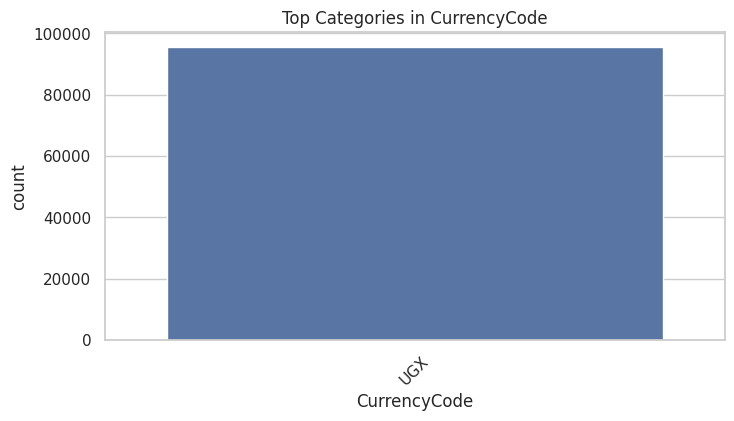

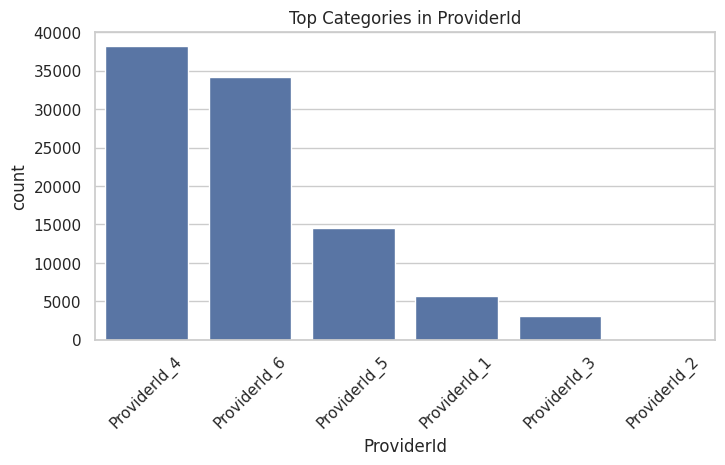

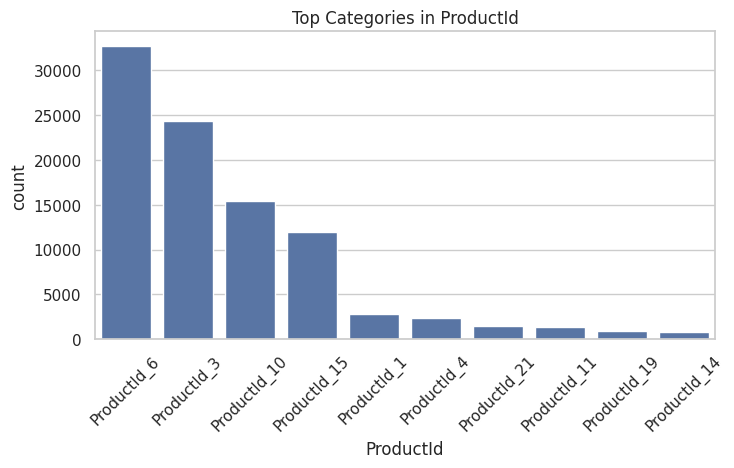

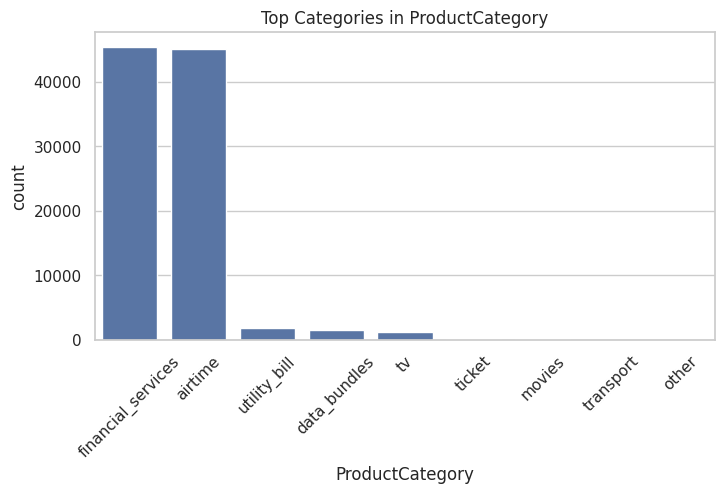

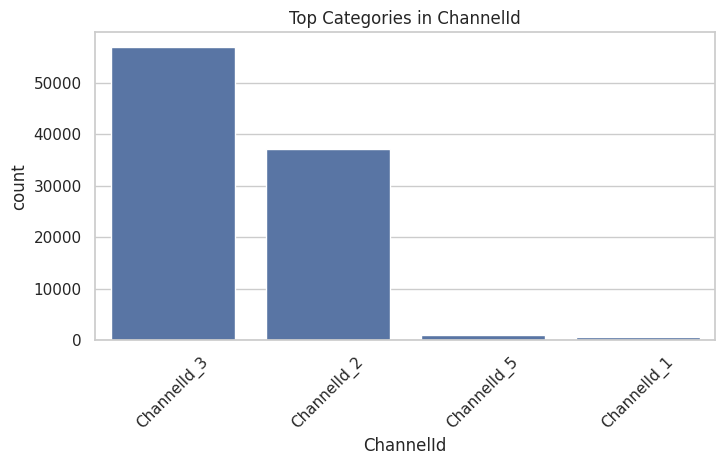

In [ ]:
# 📋 Cell 6: Distribution of top categorical columns

cat_cols = df.select_dtypes(include='object').columns.tolist()

for col in cat_cols:
    if df[col].nunique() <= 50:  # Skip high-cardinality text
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:10].index)
        plt.xticks(rotation=45)
        plt.title(f"Top Categories in {col}")
        plt.show()


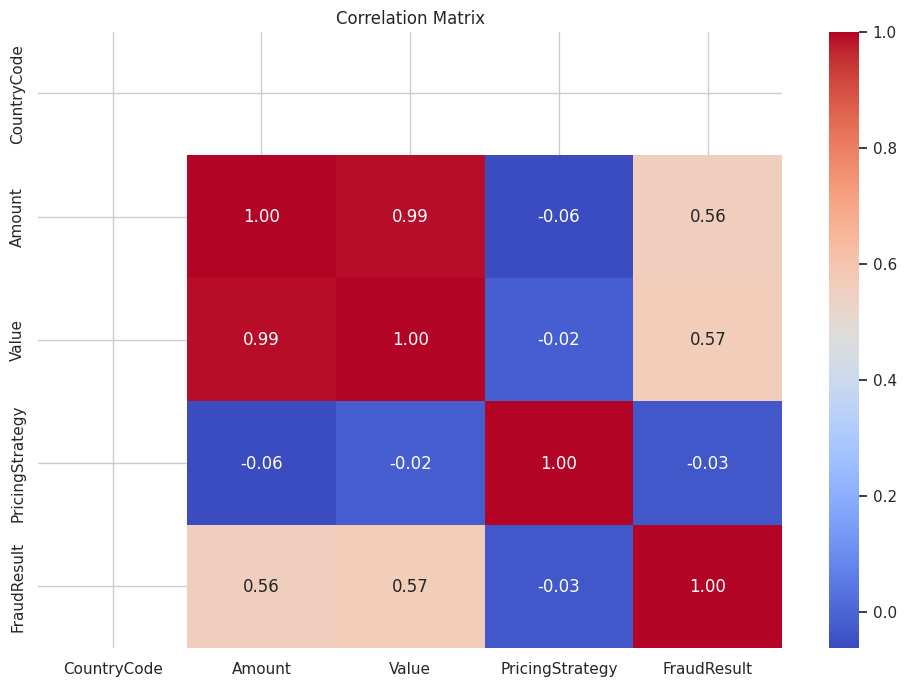

In [ ]:
# 🔗 Cell 7: Correlation heatmap

corr = df[num_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# 🧱 Cell 8: Missing value check

missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if not missing.empty:
    missing.plot(kind='barh', title="Missing Values")
    plt.xlabel("Count")
    plt.show()
else:
    print("✅ No missing values!")


✅ No missing values!


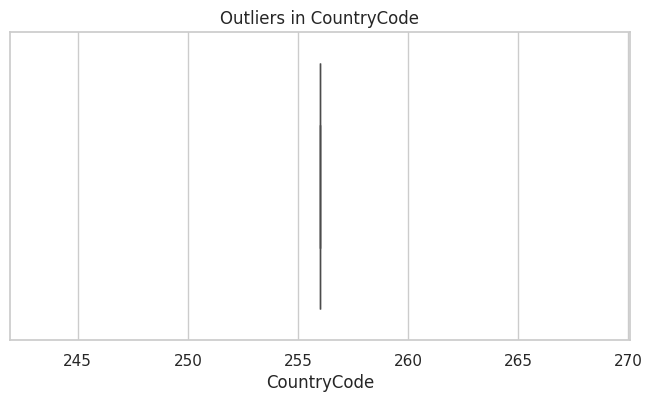

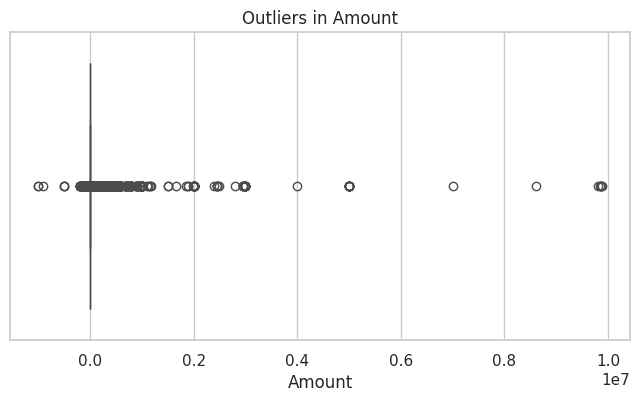

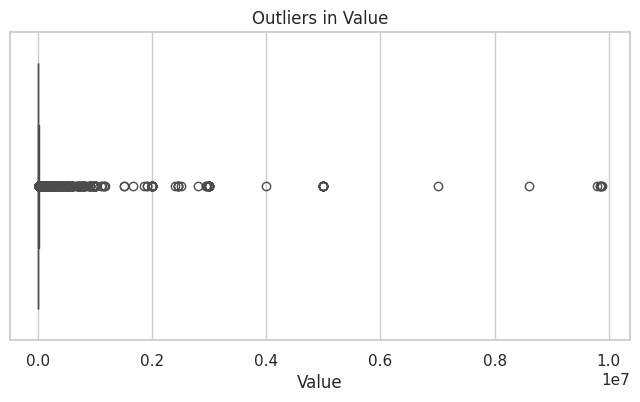

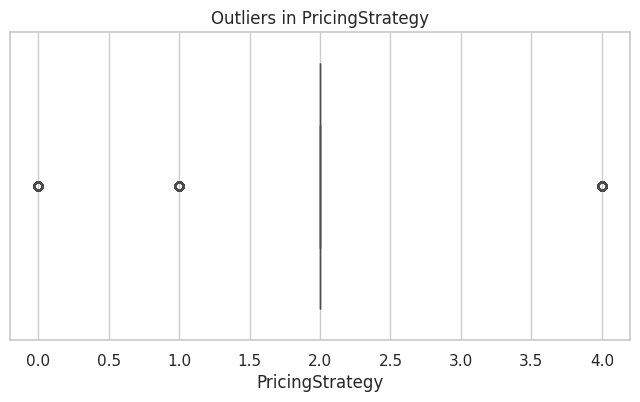

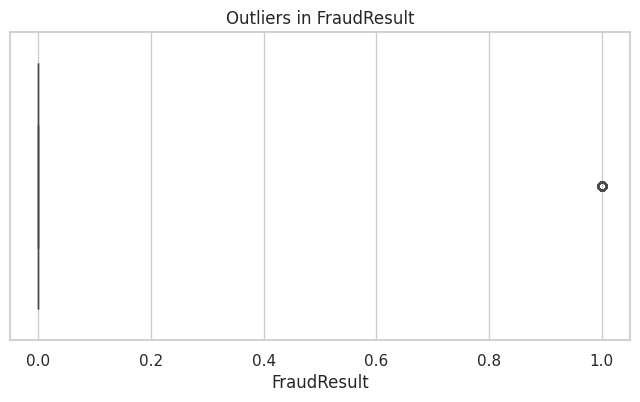

In [ ]:
# ⚠️ Cell 9: Outlier detection via boxplots

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()


In [ ]:
df.to_csv("processed_data.csv", index=False)


In [ ]:
try:
    import seaborn as sns
    print("Seaborn is installed.")
except ImportError:
    print("Seaborn is not installed. Installing now...")
    %pip install seaborn
    try:
        import seaborn as sns
        print("Seaborn installed successfully.")
    except ImportError:
        print("Failed to install seaborn.")

Seaborn is installed.
